# Assignment 1 (Coding Part)

- Implement the required code for each problem in the allocated area.
- Write down your comments clearly.
- Please submit your notebook with outputs displayed.

## Exercise 1.10

In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def flip_coin():
    # TODO: add fair coin flipping experiment code

    coin_result = random.choice([0, 1])
    return coin_result

### Exercise 1.10 (a)

In [3]:
# TODO: add solution for point a

'''
mu for coins in bin = 0.5
as mu is the true probability of the data
and they are fair coin where head probability = 0.5
'''

def simulate_flipping_coins(number_of_coins,coin_flips):

    coins_heads_fraction = [] # v's

    for i in range (number_of_coins):
        heads = 0
        for i in range (coin_flips):
            heads += flip_coin()
        heads /= coin_flips
        coins_heads_fraction.append(heads)    

    v_1 = coins_heads_fraction[0]
    v_rand = random.choice(coins_heads_fraction)
    v_min = min(coins_heads_fraction)

    return v_1, v_rand, v_min

v_1, v_rand, v_min = simulate_flipping_coins(1000, 10)
print("v_1: %f, v_rand: %f, v_min: %f" % (v_1, v_rand, v_min))


v_1: 0.500000, v_rand: 0.400000, v_min: 0.000000


### Exercise 1.10 (b)

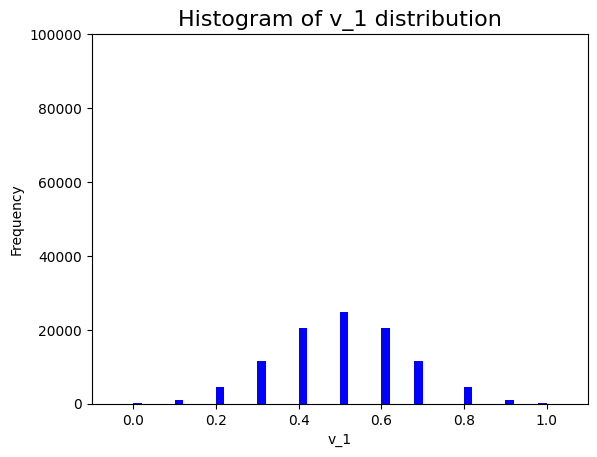

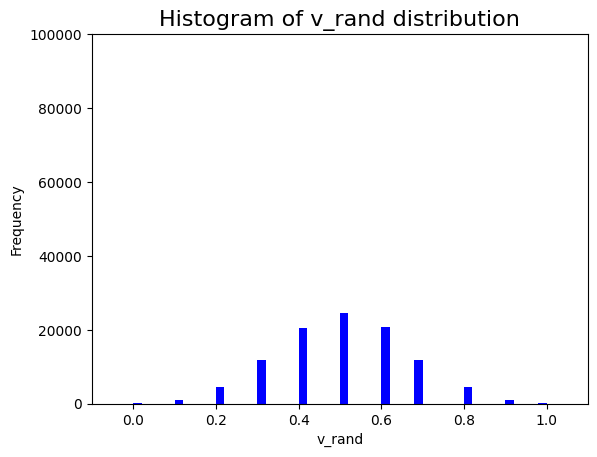

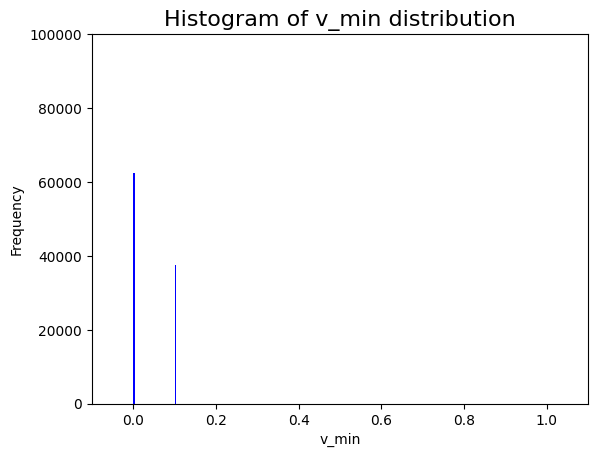

In [4]:
# TODO: add solution for point b


v_1_list, v_rand_list, v_min_list = [], [], []
number_of_runs = 100000

for i in range(number_of_runs):
    v_1, v_rand, v_min = simulate_flipping_coins(1000, 10)
    v_1_list.append(v_1)
    v_rand_list.append(v_rand)
    v_min_list.append(v_min)

def plot_histogram(data, xlabel, title):

    plt.hist(data, bins=50, color='blue')
    plt.xlim(-0.1, 1.1)
    plt.ylim(0, number_of_runs)

    plt.xlabel(xlabel)
    plt.ylabel('Frequency')
    plt.title(title, fontsize=16)

    plt.show()

plot_histogram(v_1_list,'v_1', 'Histogram of v_1 distribution')
plot_histogram(v_rand_list, 'v_rand', 'Histogram of v_rand distribution')
plot_histogram(v_min_list, 'v_min', 'Histogram of v_min distribution')

### Exercise 1.10 (c)

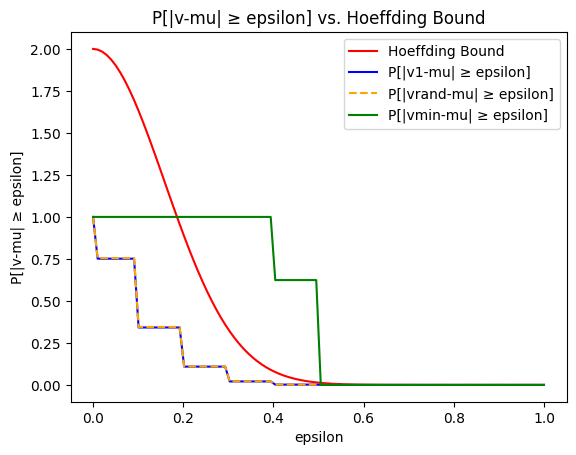

In [5]:
# TODO: add solution for point c

def get_hoeffding_bound(epsilon, N):
    return 2 * np.exp(-2 * epsilon**2 * N)

def estimate_probability(v, mu, epsilon):
    probability = np.sum(np.abs(v - mu) >= epsilon) / len(v)
    return probability

epsilon_values = np.linspace(0, 1, 100)
hoeffding_bounds = [get_hoeffding_bound(epsilon, 10) for epsilon in epsilon_values]
plt.plot(epsilon_values, hoeffding_bounds, color='red', label='Hoeffding Bound')

v_1_probability = [estimate_probability(np.array(v_1_list), 0.5, epsilon) for epsilon in epsilon_values]
v_rand_probability = [estimate_probability(np.array(v_rand_list), 0.5, epsilon) for epsilon in epsilon_values]
v_min_probability = [estimate_probability(np.array(v_min_list), 0.5, epsilon) for epsilon in epsilon_values]

plt.plot(epsilon_values, v_1_probability, color='blue', label='P[|v1-mu| ≥ epsilon]')
plt.plot(epsilon_values, v_rand_probability, color='orange', label='P[|vrand-mu| ≥ epsilon]', linestyle='--')
plt.plot(epsilon_values, v_min_probability, color='green', label='P[|vmin-mu| ≥ epsilon]')

plt.xlabel('epsilon')
plt.ylabel('P[|v-mu| ≥ epsilon]')
plt.title('P[|v-mu| ≥ epsilon] vs. Hoeffding Bound')
plt.legend()
plt.show()

### Exercise 1.10 (d)

In [6]:
# TODO: add solution for point d
'''
To obey the Hoeffding bound, Hoeffdeing's Inequality should be achieved:
P[|v1-mu| ≥ epsilon] <= hoeffding_bound
P[|v1-mu| ≥ epsilon] <= 2 * exp(-2 * epsilon**2 * N)

Coins that obey this:
c_1 & c_rand (which are exactly the same as shown in the figure)

Coins that don't:
c_min

----------------------------------

A fundamental assumption made in this analysis is that
the sample is taken randomly 
and training and testing data have the same distribution.

This is achieved in case of c_1 & c_rand
in which the sample is taken randomly and independent 

but this is not achieved in case of c_min
in which the sample is dependent on the training data 
as it is got after getting all c and getting their minimum

'''


"\nTo obey the Hoeffding bound, Hoeffdeing's Inequality should be achieved:\nP[|v1-mu| ≥ epsilon] <= hoeffding_bound\nP[|v1-mu| ≥ epsilon] <= 2 * exp(-2 * epsilon**2 * N)\n\nCoins that obey this:\nc_1 & c_rand (which are exactly the same as shown in the figure)\n\nCoins that don't:\nc_min\n\n----------------------------------\n\nA fundamental assumption made in this analysis is that\nthe sample is taken randomly \nand training and testing data have the same distribution.\n\nThis is achieved in case of c_1 & c_rand\nin which the sample is taken randomly and independent \n\nbut this is not achieved in case of c_min\nin which the sample is dependent on the training data \nas it is got after getting all c and getting their minimum\n\n"

### Exercise 1.10 (e)

In [7]:
# TODO: add solution for point e

'''
For multiple bins (multiple runs)
P[|v1-mu| ≥ epsilon] <= 2 * M * exp(-2 * epsilon**2 * N)


c_1 as we choose the first bin,
c_rand as we choose a bin randomly,
c_min as we choose the bin with minimum error

so we can generalize the previous concept 
as c_1 & c_rand are chosen randomly and independent 
but c_min is dependent on the training data and not randomly

It's mainly about choosing samples randomly and independent 
as it's a fundamental assumption in the analysis
not the number of hypothesis 
'''

"\nFor multiple bins (multiple runs)\nP[|v1-mu| ≥ epsilon] <= 2 * M * exp(-2 * epsilon**2 * N)\n\n\nc_1 as we choose the first bin,\nc_rand as we choose a bin randomly,\nc_min as we choose the bin with minimum error\n\nso we can generalize the previous concept \nas c_1 & c_rand are chosen randomly and independent \nbut c_min is dependent on the training data and not randomly\n\nIt's mainly about choosing samples randomly and independent \nas it's a fundamental assumption in the analysis\nnot the number of hypothesis \n"

## Problem 1.4

### Problem 1.4 (a)

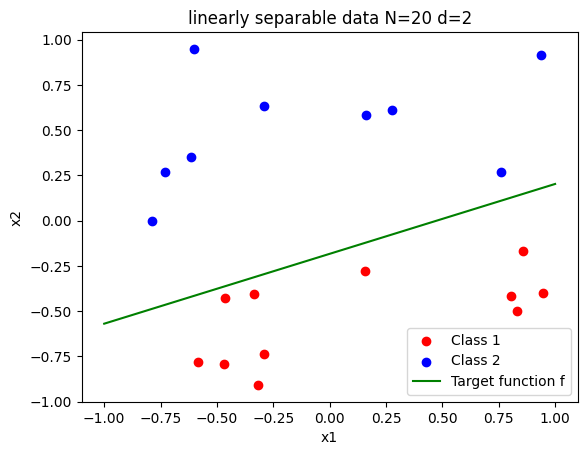

In [198]:
def generate_dataset(d, N):
    # TODO: add dataset generation code

    w = np.random.uniform(-1, 1, size=(d + 1))

    x = np.random.uniform(-1, 1, size=(N, d))
    x = np.insert(x, 0, 1, axis=1)

    y = np.sign(np.dot(x, w))

    return w, x, y


def plot_data(w, x, y, w_alg = None):

    class_1_examples = x[y == 1]
    class_2_examples = x[y == -1]

    plt.scatter(class_1_examples[:, 1], class_1_examples[:, 2], c='red', label='Class 1', marker='o')
    plt.scatter(class_2_examples[:, 1], class_2_examples[:, 2], c='blue', label='Class 2', marker='o')
    
    decision_boundary_x = np.linspace(-1, 1, 100)
    decision_boundary_y = (-w[0] - w[1] * decision_boundary_x) / w[2]
    plt.plot(decision_boundary_x, decision_boundary_y, color='green', label='Target function f')

    if w_alg is not None:
        decision_boundary_y2 = (-w_alg[0] - w_alg[1] * decision_boundary_x) / w_alg[2]
        plt.plot(decision_boundary_x, decision_boundary_y2, color='black', label='Final hypothesis g')

    plt.title('linearly separable data N=%d d=%d' %(x.shape[0], x.shape[1]-1))
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()


target_w1, x1, y1 = generate_dataset(d=2, N=20)
plot_data(target_w1, x1, y1)

### Problem 1.4 (b)

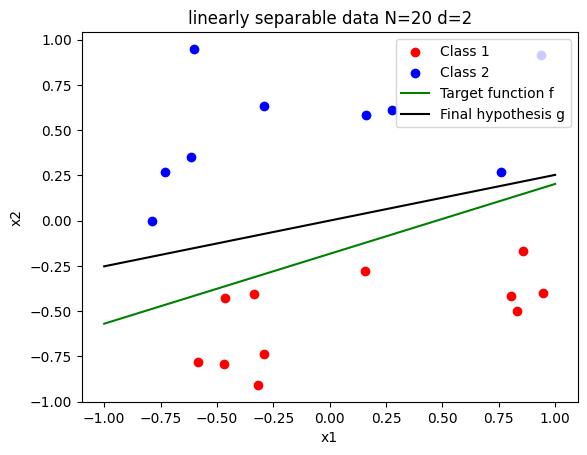

In [199]:
def run_perceptron_learning(x, y, d):
    # TODO: add perceptron learning algorithm code

    w = np.zeros(shape=(d + 1, ))
    updates = 0

    while True:
        m = 0
        for xi, yi in zip(x, y):
            if yi * np.dot(xi, w) <=0:
                w += yi * xi
                m += 1
                updates += 1
        
        if m == 0:
            break

    return w, updates

w1, updates1 = run_perceptron_learning(x1, y1, d = 2)
plot_data(target_w1, x1, y1, w1)

In [200]:
# TODO: add solution for the rest of the point
print("Number of updates: %d" %(updates1))
print('g is close to f as shown in the plot')

Number of updates: 6
f is close to g as shown in the plot


### Problem 1.4 (c)

Number of updates: 36
g is still close to f as shown in the plot
it is different from b as the data is generated randomly


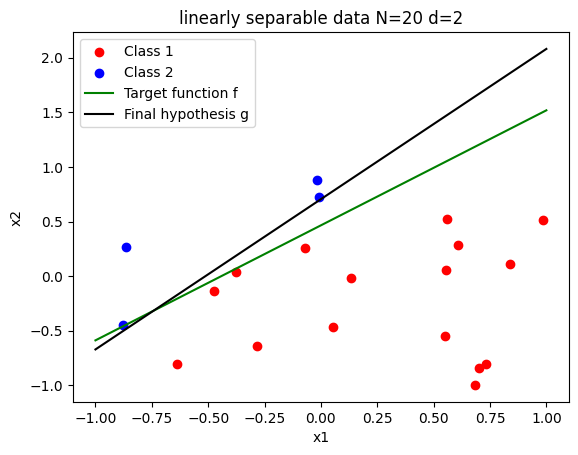

In [233]:
# TODO: add solution for point c

target_w2, x2, y2 = generate_dataset(d=2, N=20)

w2, updates2 = run_perceptron_learning(x2, y2, d = 2)
print("Number of updates: %d" %(updates2))

print('''
g is still close to f as shown in the plot
it is different from b as the data is generated randomly
''')

plot_data(target_w2, x2, y2, w2)

### Problem 1.4 (d)

Number of updates: 25

g is closer to f than in b & c

as dataset size N is increased 
and this means more data points to train on
so the probability that they are closer increase 
and the bound decrease


but on the other side, the number of updates taken before converging is increased more than in b
which takes more time and computations



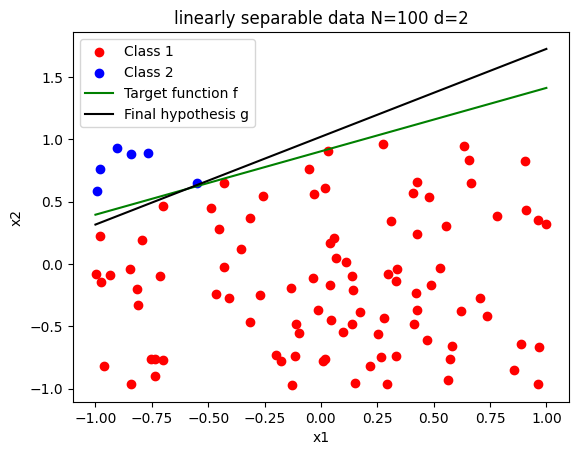

In [235]:
# TODO: add solution for point d

target_w3, x3, y3 = generate_dataset(d=2, N=100)

w3, updates3 = run_perceptron_learning(x3, y3, d = 2)
print("Number of updates: %d" %(updates3))

print('''
g is closer to f than in b & c

as dataset size N is increased 
and this means more data points to train on
so the probability that they are closer increase 
and the bound decrease


but on the other side, the number of updates taken before converging is increased more than in b
which takes more time and computations
''')

plot_data(target_w3, x3, y3, w3)

### Problem 1.4 (e)

Number of updates: 332

the two lines are almost the same
and g is closer to f than previous trials

as dataset size is much more than previous trials
and this means much more points to train on
so the probability that they are closer significantly increase 
and the bound significantly decrease

and it is also take more time and computations 
and number of updates taken before converging is more than previous trials



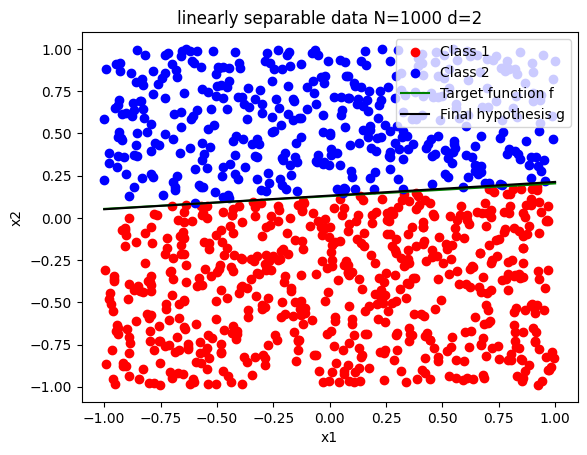

In [237]:
# TODO: add solution for point e

target_w4, x4, y4 = generate_dataset(d=2, N=1000)

w4, updates4 = run_perceptron_learning(x4, y4, d = 2)
print("Number of updates: %d" %(updates4))

print('''
the two lines are almost the same
and g is closer to f than previous trials

as dataset size is much more than previous trials
and this means much more points to train on
so the probability that they are closer significantly increase 
and the bound significantly decrease

and it is also take more time and computations 
and number of updates taken before converging is more than previous trials
''')

plot_data(target_w4, x4, y4, w4)

### Problem 1.4 (f)

In [254]:
# TODO: add solution for point f

target_w5, x5, y5 = generate_dataset(d=10, N=1000)

w5, updates5 = run_perceptron_learning(x5, y5, d = 10)
print("Number of updates: %d" %(updates5))

print('''
number of updates taken before converging is very higher than in e
''')

Number of updates: 5339

number of updates taken before converging is very higher than in e



### Problem 1.4 (g)

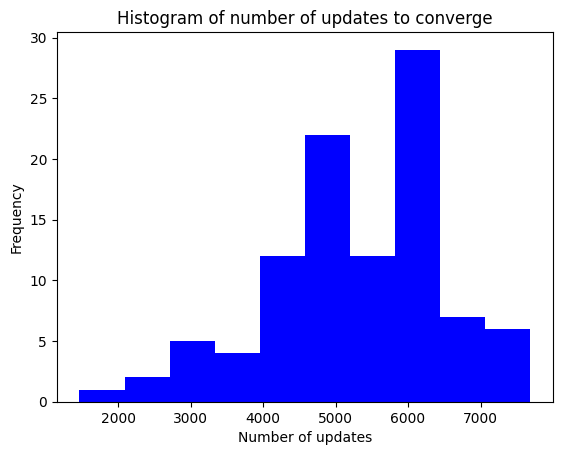

In [258]:
updates_list = []
for i in range(100):

    combined_x_y = list(zip(x5, y5))
    random.shuffle(combined_x_y)
    shuffled_x, shuffled_y = zip(*combined_x_y)

    w, updates = run_perceptron_learning(shuffled_x, shuffled_y, d = 10)
    updates_list.append(updates)

plt.hist(updates_list, bins=10, color='blue')
plt.title('Histogram of number of updates to converge')
plt.xlabel('Number of updates')
plt.ylabel('Frequency')
plt.show()

### Problem 1.4 (h)

In [259]:
print('''
increasing dataset size N
increases the accuracy (how much g is close or approximates to f)
increases running time and number of updates taken until converge

incresing number of deminsions d
increases running time and required computations

''')


increasing dataset size N
increases the accuracy (how much g is close or approximates to f)
increases running time and number of updates taken until converge

incresing number of deminsions d
increases running time and required computations


